### Import Libraries

In [1]:
import sys
sys.executable

'c:\\Program Files\\Python311\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import random
import pickle
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

### Import Dataset

In [3]:
cropdf = pd.read_csv("Crop_recommendation.csv")
cropdf

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
cropdf.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
cropdf.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [6]:
cropdf['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
cropdf.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
crop_summary = pd.pivot_table(cropdf,index=['label'],aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


### Data Analysis and Visualization

Nitrogen Analysis

In [9]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [10]:
crop_scatter = cropdf[(cropdf['label']=='rice') | 
                      (cropdf['label']=='jute') | 
                      (cropdf['label']=='cotton') |
                     (cropdf['label']=='maize') |
                     (cropdf['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white', width=800, height=600)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [11]:
features = cropdf[['ph', 'N', 'temperature', 'humidity', 'rainfall']]
target = cropdf['label']

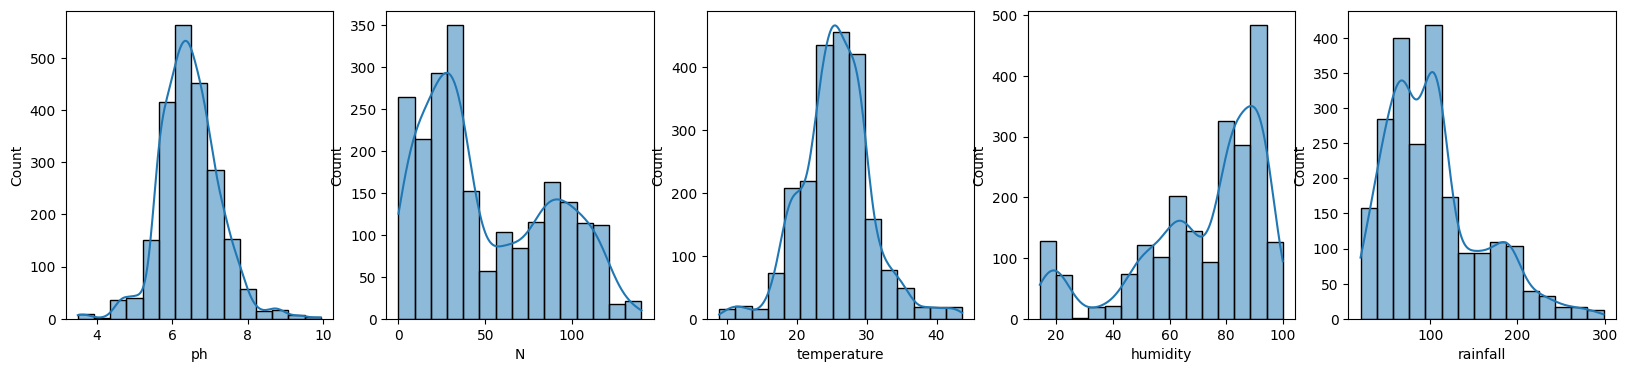

In [12]:
plt.figure(figsize=(20, 4))

idx = 1
for feature in features:
    plt.subplot(1, features.shape[1], idx)
    sns.histplot(cropdf[feature], bins=15, kde=True, alpha=0.5)
    idx = idx + 1

plt.show()

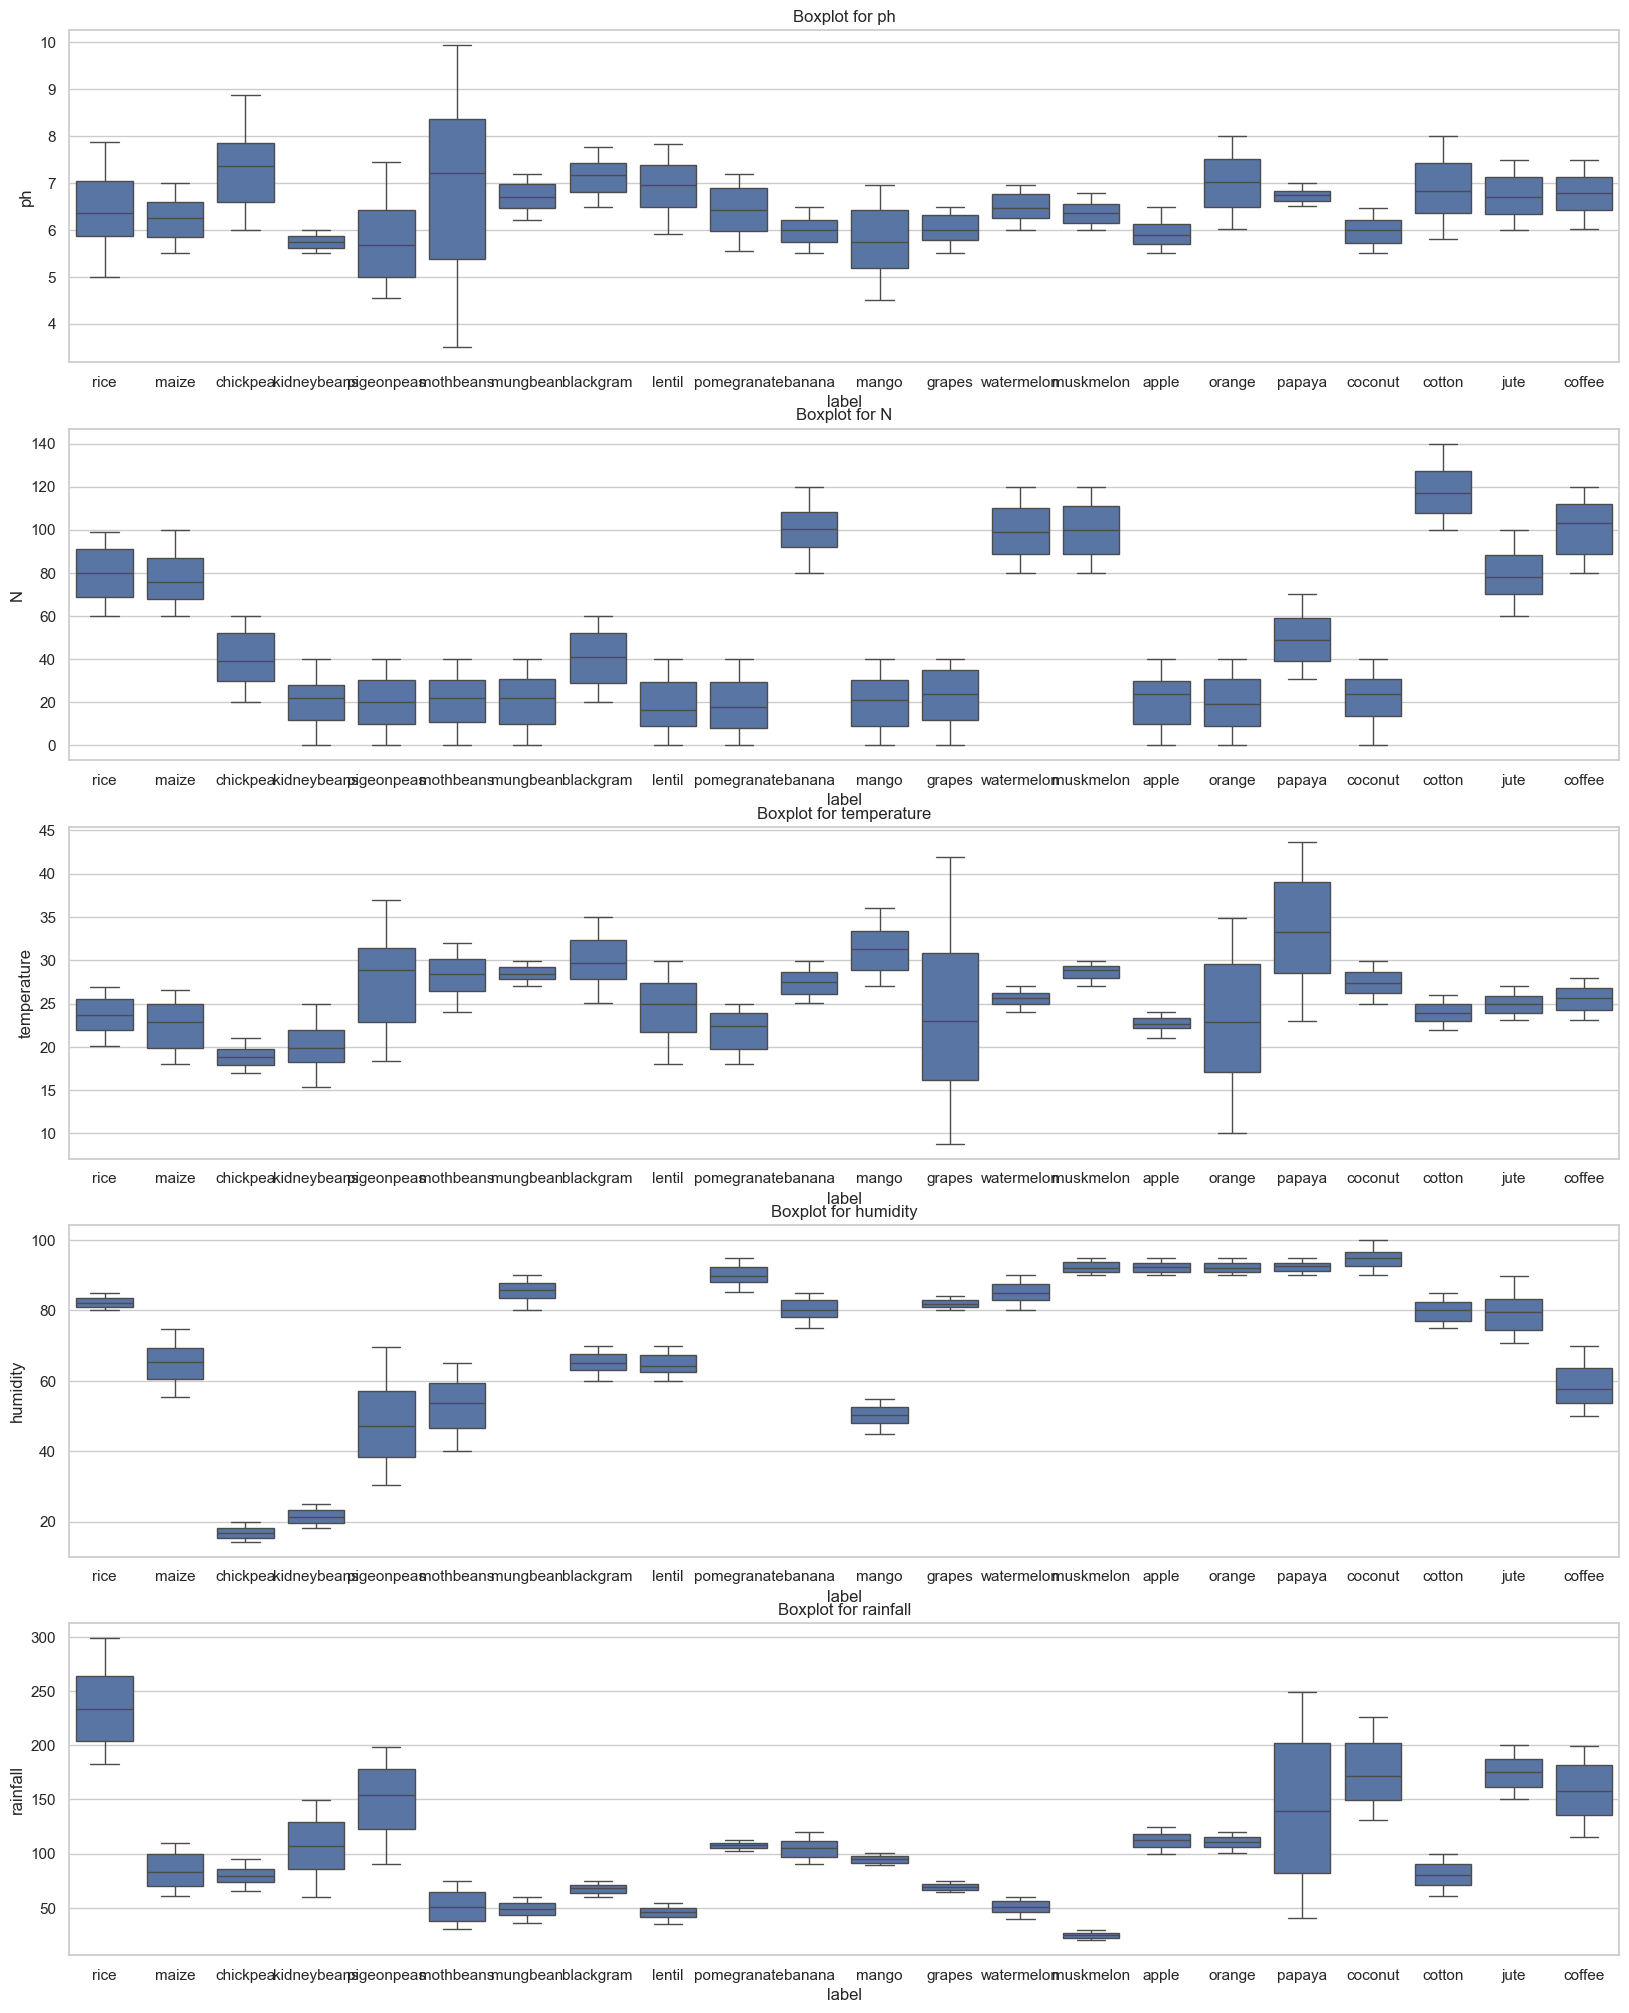

In [13]:
sns.set_theme(style="whitegrid")

feature_names = ['ph', 'N', 'temperature', 'humidity', 'rainfall']

fig, axes = plt.subplots(len(feature_names), 1, figsize=(20, 25))

for i, feature in enumerate(feature_names):
    sns.boxplot(x=target, y=cropdf[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')

plt.show()

<Axes: >

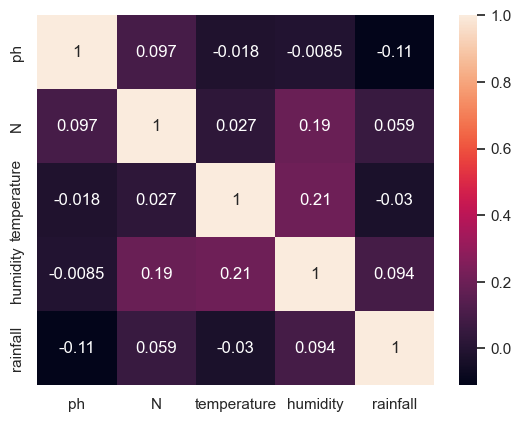

In [14]:
sns.heatmap(features.corr(),annot=True)

In [15]:
features.corr()

,ph,N,temperature,humidity,rainfall
ph,1.000000,0.096683,-0.017795,-0.008483,-0.109069
N,0.096683,1.000000,0.026504,0.190688,0.059020
temperature,-0.017795,0.026504,1.000000,0.205320,-0.030084
humidity,-0.008483,0.190688,0.205320,1.000000,0.094423
rainfall,-0.109069,0.059020,-0.030084,0.094423,1.000000


### Model

In [16]:
acc = []
model = []

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42, stratify=target)

##### Decision Tree

In [18]:
DecisionTree = DecisionTreeClassifier()
# criterion="entropy",random_state=2,max_depth=5

DecisionTree.fit(X_train, y_train)

predicted_values = DecisionTree.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Trees Accuracy is: ", x*100)

print("\nClassification Report:\n", classification_report(y_test, predicted_values))

Decision Trees Accuracy is:  94.0909090909091

Classification Report:
               precision    recall  f1-score   support

       apple       0.69      0.90      0.78        10
      banana       0.89      0.80      0.84        10
   blackgram       1.00      0.90      0.95        10
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        10
      coffee       1.00      1.00      1.00        10
      cotton       0.82      0.90      0.86        10
      grapes       1.00      1.00      1.00        10
        jute       0.91      1.00      0.95        10
 kidneybeans       1.00      1.00      1.00        10
      lentil       0.91      1.00      0.95        10
       maize       0.91      1.00      0.95        10
       mango       1.00      1.00      1.00        10
   mothbeans       1.00      0.90      0.95        10
    mungbean       1.00      1.00      1.00        10
   muskmelon       1.00      1.00      1.00        10
      oran

In [19]:
score = cross_val_score(DecisionTree, features, target, cv=10)
score

array([0.96818182, 0.96818182, 0.97272727, 0.94545455, 0.95      ,
       0.93636364, 0.95      , 0.93181818, 0.94090909, 0.97272727])

In [20]:
joblib.dump(DecisionTree, "DecisionTree.pkl")

['DecisionTree.pkl']

In [21]:
# joblib.load("DecisionTree.pkl")

##### Gaussian Naive Bayes

In [18]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train, y_train)

predicted_values = NaiveBayes.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x*100)

print("\nClassification Report:\n", classification_report(y_test, predicted_values))

Naive Bayes Accuracy is:  96.81818181818181

Classification Report:
               precision    recall  f1-score   support

       apple       0.83      1.00      0.91        10
      banana       1.00      1.00      1.00        10
   blackgram       1.00      1.00      1.00        10
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        10
      coffee       1.00      1.00      1.00        10
      cotton       1.00      1.00      1.00        10
      grapes       1.00      1.00      1.00        10
        jute       0.91      1.00      0.95        10
 kidneybeans       1.00      1.00      1.00        10
      lentil       0.91      1.00      0.95        10
       maize       1.00      1.00      1.00        10
       mango       1.00      1.00      1.00        10
   mothbeans       1.00      0.90      0.95        10
    mungbean       1.00      1.00      1.00        10
   muskmelon       1.00      1.00      1.00        10
      orange

In [19]:
score = cross_val_score(NaiveBayes, features, target, cv=10)
score

array([0.99545455, 0.96363636, 0.97727273, 0.95454545, 0.96818182,
       0.95909091, 0.97272727, 0.96818182, 0.96818182, 0.97727273])

In [20]:
joblib.dump(NaiveBayes, "NaiveBayes.pkl")

['NaiveBayes.pkl']

In [21]:
# joblib.load("NaiveBayes.pkl")

##### Support Vector Machine

In [26]:
SVM = SVC()

SVM.fit(X_train, y_train)

predicted_values = SVM.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM Accuracy is: ", x*100)

print("\nClassification Report:\n", classification_report(y_test, predicted_values))

SVM Accuracy is:  84.54545454545455

Classification Report:
               precision    recall  f1-score   support

       apple       0.38      0.50      0.43        10
      banana       1.00      0.90      0.95        10
   blackgram       1.00      1.00      1.00        10
    chickpea       0.71      1.00      0.83        10
     coconut       0.89      0.80      0.84        10
      coffee       1.00      1.00      1.00        10
      cotton       0.90      0.90      0.90        10
      grapes       0.91      1.00      0.95        10
        jute       0.83      1.00      0.91        10
 kidneybeans       1.00      0.60      0.75        10
      lentil       0.83      1.00      0.91        10
       maize       1.00      1.00      1.00        10
       mango       0.91      1.00      0.95        10
   mothbeans       1.00      0.80      0.89        10
    mungbean       0.91      1.00      0.95        10
   muskmelon       1.00      1.00      1.00        10
      orange       0

In [27]:
score = cross_val_score(SVM,features,target,cv=10)
score

array([0.84090909, 0.88181818, 0.85454545, 0.80909091, 0.85      ,
       0.83636364, 0.88181818, 0.80909091, 0.83636364, 0.84090909])

In [28]:
joblib.dump(SVM, "SVM.pkl")

['SVM.pkl']

In [29]:
# joblib.load("SVM.pkl")

##### Logistic Regression

In [30]:
LogReg = LogisticRegression()

LogReg.fit(X_train, y_train)

predicted_values = LogReg.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is: ", x)

print("\nClassification Report:\n", classification_report(y_test, predicted_values))

Logistic Regression Accuracy is:  0.7772727272727272

Classification Report:
               precision    recall  f1-score   support

       apple       0.50      0.60      0.55        10
      banana       0.80      0.80      0.80        10
   blackgram       0.73      0.80      0.76        10
    chickpea       0.75      0.90      0.82        10
     coconut       0.82      0.90      0.86        10
      coffee       1.00      1.00      1.00        10
      cotton       0.71      1.00      0.83        10
      grapes       0.88      0.70      0.78        10
        jute       0.91      1.00      0.95        10
 kidneybeans       0.83      0.50      0.62        10
      lentil       0.73      0.80      0.76        10
       maize       0.83      0.50      0.62        10
       mango       0.91      1.00      0.95        10
   mothbeans       0.55      0.60      0.57        10
    mungbean       0.83      1.00      0.91        10
   muskmelon       1.00      1.00      1.00        10
   

/Users/tejal/Desktop/college/Sem 8/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [31]:
score = cross_val_score(LogReg,features,target,cv=10)
score

/Users/tejal/Desktop/college/Sem 8/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/tejal/Desktop/college/Sem 8/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

array([0.75      , 0.75454545, 0.77727273, 0.71818182, 0.73636364,
       0.75909091, 0.80454545, 0.74545455, 0.8       , 0.81363636])

In [32]:
joblib.dump(LogReg, "LogisticRegression.pkl")

['LogisticRegression.pkl']

In [33]:
# joblib.load("LogisticRegression.pkl")

##### Random Forest

In [34]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)

RF.fit(X_train, y_train)

predicted_values = RF.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print("\nClassification Report:\n", classification_report(y_test, predicted_values))

Random Forest Accuracy is:  0.95

Classification Report:
               precision    recall  f1-score   support

       apple       0.71      1.00      0.83        10
      banana       1.00      1.00      1.00        10
   blackgram       1.00      0.90      0.95        10
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        10
      coffee       1.00      1.00      1.00        10
      cotton       1.00      1.00      1.00        10
      grapes       1.00      1.00      1.00        10
        jute       0.91      1.00      0.95        10
 kidneybeans       1.00      1.00      1.00        10
      lentil       0.91      1.00      0.95        10
       maize       0.91      1.00      0.95        10
       mango       0.91      1.00      0.95        10
   mothbeans       1.00      0.90      0.95        10
    mungbean       1.00      1.00      1.00        10
   muskmelon       1.00      1.00      1.00        10
      orange       0.89

In [35]:
score = cross_val_score(RF, features, target, cv=10)
score

array([0.97272727, 0.96363636, 0.98181818, 0.97727273, 0.96363636,
       0.98181818, 0.97272727, 0.95      , 0.96818182, 0.98181818])

In [36]:
joblib.dump(RF, "RandomForest.pkl")

['RandomForest.pkl']

In [37]:
# joblib.load("RandomForest.pkl")

##### K Nearest Neighbours

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

predicted_values = knn.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('KNN')
print("KNN Accuracy is: ", x*100)

print("\nClassification Report:\n", classification_report(y_test, predicted_values))

KNN Accuracy is:  87.27272727272727

Classification Report:
               precision    recall  f1-score   support

       apple       0.50      0.80      0.62        10
      banana       1.00      0.80      0.89        10
   blackgram       1.00      1.00      1.00        10
    chickpea       0.71      1.00      0.83        10
     coconut       0.91      1.00      0.95        10
      coffee       1.00      0.80      0.89        10
      cotton       0.83      1.00      0.91        10
      grapes       1.00      1.00      1.00        10
        jute       0.82      0.90      0.86        10
 kidneybeans       1.00      0.60      0.75        10
      lentil       0.77      1.00      0.87        10
       maize       1.00      1.00      1.00        10
       mango       0.91      1.00      0.95        10
   mothbeans       1.00      0.70      0.82        10
    mungbean       0.91      1.00      0.95        10
   muskmelon       1.00      1.00      1.00        10
      orange       0

In [39]:
score = cross_val_score(knn,features,target,cv=10)
score

array([0.87727273, 0.87272727, 0.89545455, 0.86818182, 0.88181818,
       0.87727273, 0.91818182, 0.87272727, 0.89545455, 0.89545455])

In [40]:
joblib.dump(knn, "KNN.pkl")

['KNN.pkl']

In [41]:
# joblib.load("KNN.pkl")

##### XGBoost

In [42]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

XB = xgb.XGBClassifier()
XB.fit(X_train, y_train_encoded)

predicted_values = XB.predict(X_test)
predicted_labels = label_encoder.inverse_transform(predicted_values)

x = accuracy_score(y_test, predicted_labels)
acc.append(x)
model.append('XGBoost')
print("XGBoost Accuracy is: ", x * 100)

print("\nClassification Report:\n", classification_report(y_test, predicted_labels))

XGBoost Accuracy is:  95.45454545454545

Classification Report:
               precision    recall  f1-score   support

       apple       0.75      0.90      0.82        10
      banana       1.00      0.90      0.95        10
   blackgram       0.91      1.00      0.95        10
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        10
      coffee       1.00      1.00      1.00        10
      cotton       0.91      1.00      0.95        10
      grapes       1.00      0.90      0.95        10
        jute       1.00      1.00      1.00        10
 kidneybeans       1.00      1.00      1.00        10
      lentil       0.91      1.00      0.95        10
       maize       1.00      1.00      1.00        10
       mango       0.91      1.00      0.95        10
   mothbeans       1.00      0.90      0.95        10
    mungbean       1.00      1.00      1.00        10
   muskmelon       1.00      1.00      1.00        10
      orange    

In [43]:
joblib.dump(XB, 'XGBoost.pkl')
joblib.dump(label_encoder, 'xgboost_label_encoder.pkl')

['xgboost_label_encoder.pkl']

In [44]:
# XB_loaded = joblib.load('xgboost_model.pkl')
# label_encoder_loaded = joblib.load('label_encoder.pkl')

# predicted_values = XB_loaded.predict(X_test)
# predicted_labels = label_encoder_loaded.inverse_transform(predicted_values)

# print("\nClassification Report:\n", classification_report(y_test, predicted_labels))

##### LightGBM

In [45]:
lgbm = lgb.LGBMClassifier()

lgbm.fit(X_train, y_train)

predicted_values = lgbm.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('LightGBM')
print("LightGBM Accuracy is: ", x*100)

print("\nClassification Report:\n", classification_report(y_test, predicted_values))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 1980, number of used features: 5
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] 

In [46]:
score = cross_val_score(lgbm, features, target, cv=10)
score

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 1980, number of used features: 5
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] 

array([0.95909091, 0.95909091, 0.97272727, 0.97727273, 0.97272727,
       0.97272727, 0.95909091, 0.96363636, 0.98181818, 0.97727273])

In [47]:
joblib.dump(lgbm, "LightGBM.pkl")

['LightGBM.pkl']

In [48]:
# joblib.load("LightGBM.pkl")

### Comparison

C:\Users\shekh\AppData\Local\Temp\ipykernel_11104\3771447637.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

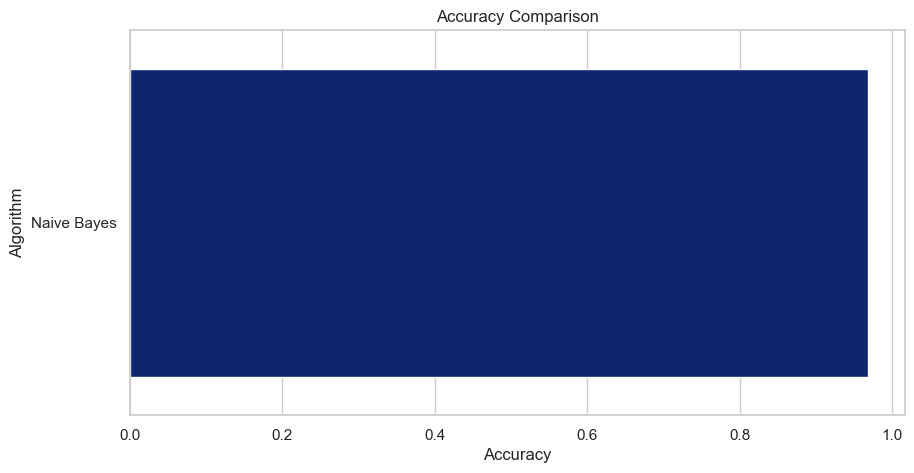

In [34]:
plt.figure(figsize=[10,5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=model, palette='dark')

In [35]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Naive Bayes --> 0.9681818181818181


### Testing

In [22]:
# data = np.array([[6.5, 154, 25.67, 46.05, 0.0]])
# prediction = NaiveBayes.predict(data)
# print(prediction)

In [23]:
import api_main

In [24]:
lat, lon = 12.6168187, 77.4426732
api_key = "6d0e90511f9847a68f6987f9b61acfba"  # Get from https://opencagedata.com

features = api_main.get_crop_features(lat, lon, api_key)
print(features)

Available Image IDs: ['MODIS/061/MOD13A1/2024_03_05']
SoilGrids API Response: {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [77.4426732, 12.6168187]}, 'properties': {'layers': [{'name': 'phh2o', 'unit_measure': {'d_factor': 10, 'mapped_units': 'pH*10', 'target_units': '-', 'uncertainty_unit': ''}, 'depths': [{'range': {'top_depth': 0, 'bottom_depth': 5, 'unit_depth': 'cm'}, 'label': '0-5cm', 'values': {'mean': 65}}]}]}, 'query_time_s': 0.09180116653442383}
SoilGrids API Response: {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [77.4426732, 12.6168187]}, 'properties': {'layers': [{'name': 'nitrogen', 'unit_measure': {'d_factor': 100, 'mapped_units': 'cg/kg', 'target_units': 'g/kg', 'uncertainty_unit': ''}, 'depths': [{'range': {'top_depth': 0, 'bottom_depth': 5, 'unit_depth': 'cm'}, 'label': '0-5cm', 'values': {'mean': 154}}]}]}, 'query_time_s': 0.10874438285827637}
{'NDVI': 0.3742, 'Soil pH': 6.5, 'Soil Nitrogen': 154, 'Temperature (°C)': 25.67, 'Hum

In [25]:
received_values = [value for key, value in features.items() if key != 'NDVI']
received_array = np.array(received_values).reshape(1, -1)
received_array

array([[  6.5 , 154.  ,  25.67,  46.05,   0.  ]])

In [26]:
prediction = NaiveBayes.predict(received_array)
print(prediction)

['coffee']


C:\Users\shekh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

